### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [6]:
N = np.arange(10, 5000, 10, "int16")
sigma = 10

In [7]:
#Define MC integral function

def MC_integral(f, p, N_samples, true_integral):
    integral = sigma * np.sqrt(2 * np.pi) * np.mean(f(p(0, sigma, N_samples))) / 2
    error = np.abs((integral - true_integral) / true_integral)
                                                    
    return integral, error

#Define integrand functions

def p(mean, sigma, N):
    return st.halfnorm(loc=mean, scale=sigma).rvs(N)    #Samples of half gaussian

def f(x):
    return x**3

## MC integral for different N

In [9]:
#Compute MC integral for different N

integral_an = 2 * sigma**4
integral_mc = []
err_mc = []

for i in range(0, len(N)):
    integral, error = MC_integral(f, p, N[i], integral_an)
    
    integral_mc.append(integral)
    err_mc.append(error)

print("Analytical integral = " + str(integral_an))
print("MC integral = " + str(integral_mc[-1]))

Analytical integral = 20000
MC integral = 20182.06141062187


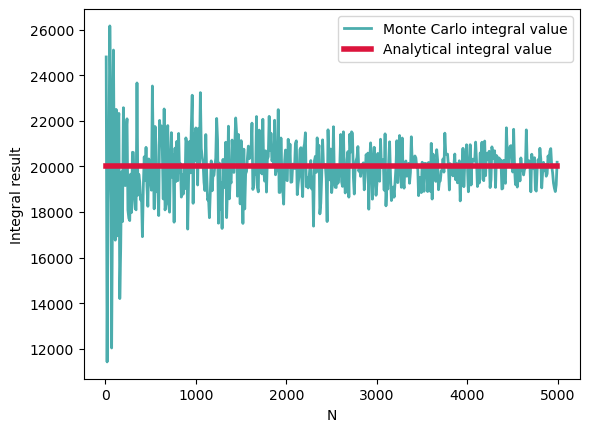

In [10]:
#Plot

plt.figure()
plt.plot(N, integral_mc, lw=2, c="darkcyan", label="Monte Carlo integral value", alpha=0.7)
plt.plot(N, np.ones(len(N)) * integral_an, lw=4, c="crimson", label="Analytical integral value")
plt.xlabel("N")
plt.ylabel("Integral result")
plt.legend()

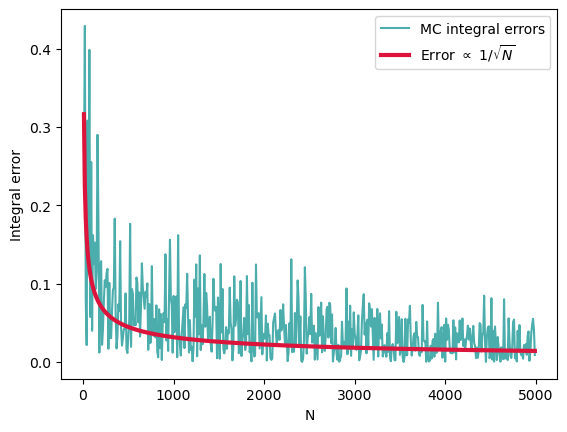

In [11]:
#Plot integral error

plt.figure()
plt.plot(N, err_mc, color="darkcyan", alpha=0.7, label="MC integral errors")
plt.plot(N, N**-0.5, lw=3, color="crimson", label="Error $\propto$ 1/$\sqrt{N}$")
plt.xlabel("N")
plt.ylabel("Integral error")
plt.legend()

## Fixed N

In [13]:
#Integral result distribution for a given N_fixed

N_fixed = [100, 1000, 5000]    #Fixed number of samples
N_tries = 1000    #Number of integral results
integral_distr = np.zeros((N_tries, len(N_fixed)))    #Distribution of N_tries integral results for every number N_fixed of samples

for j in range(0, len(N_fixed)):
    for i in range(0, N_tries):
        integral_distr[i, j] = MC_integral(f, p, N_fixed[j], integral_an)[0]

#Distribution sigma

for i in range(0, len(N_fixed)):
    print("Integral sigma (N = " + str(N_fixed[i]) + ") = " + str(np.std(integral_distr[:, i])))

Integral sigma (N = 100) = 4435.390987228119
Integral sigma (N = 1000) = 1386.1742445222858
Integral sigma (N = 5000) = 632.2658619783497


In [14]:
#Manual fit with gaussian for N = 5000

x_grid = np.linspace(0, 50000, 1000)
int_mean = np.mean(integral_distr[:, 2])
int_std = np.std(integral_distr[:, 2])
gauss = st.norm(loc=int_mean, scale=int_std)

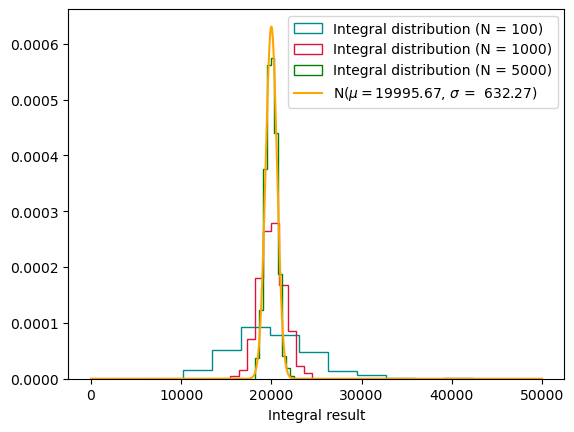

In [15]:
#Plot distributions and fit

plt.figure()
plt.hist(integral_distr[:, 0], histtype="step", color="darkcyan", label="Integral distribution (N = " + str(N_fixed[0]) + ")", density=True)
plt.hist(integral_distr[:, 1], histtype="step", color="crimson", label="Integral distribution (N = " + str(N_fixed[1]) + ")", density=True)
plt.hist(integral_distr[:, 2], histtype="step", color="green", label="Integral distribution (N = " + str(N_fixed[2]) + ")", density=True)
plt.plot(x_grid, gauss.pdf(x_grid), color="orange", label="N($\mu = " + f"{int_mean: .2f}" + "$, $\sigma$ = " + f"{int_std: .2f}" + ")")
plt.xlabel("Integral result")
plt.legend()